## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 7*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


7. Sobre la imagen microscope.png, aplicar los siguientes pasos:
- Binarizar la imagen (si no está binarizada).
- Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?
- Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde solo quede la mayor componente conexa.
- Aplicar operaciones morfológicas para contar cuántas hay células en total. ¿Comparar el número obtenido contra el número verdadero de células?

-------

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [420]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy import ndimage

---------

#### *Binarización de imagen*

En este caso, la imagen ya está binarizada (está en blanco y negro). Sin embargo, se utilizará un algoritmo de binarización para asegurarse que los pixeles sean negro o blanco. 

In [421]:
# Importar imagen en escala de grises
img = cv2.imread('img/microscope.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen con Otsu
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

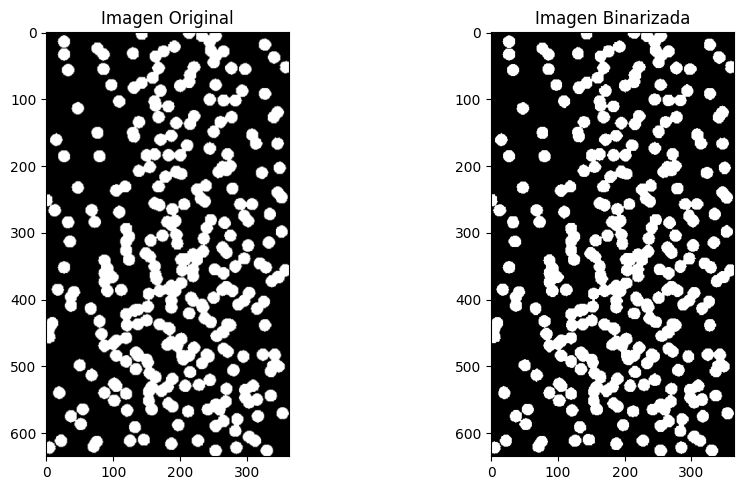

In [422]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Imagen Binarizada')

plt.tight_layout()

plt.show()

--------

#### *Componente Conexo (de menor tamaño)*

Posteriormente, se utiliza la función cv2.connectedComponentsWithStats para detectar todos los componentes conexos de la imágen.

In [423]:
# Identificación de componentes conexos
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

A partir de eso, se debe encontrar cuál es el componente conexo de menor tamaño (excluyendo el fondo negro de la imágen). Para esto, se utiliza una función que permite ordenar los componentes según su área. 

In [424]:
# Encontrar el componente conexo de menor tamaño (excluyendo el fondo)
min_component_index = np.argmin(stats[1:, cv2.CC_STAT_AREA]) + 1

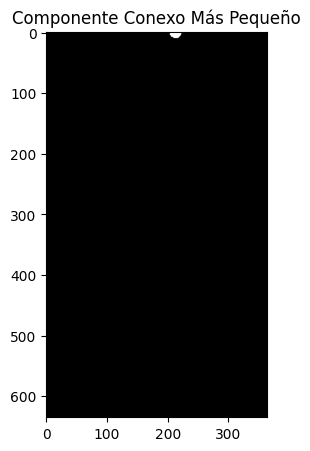

In [425]:
# Extrae la máscara del componente conexo más pequeño
min_component = (labels == min_component_index).astype(np.uint8) * 255

# Mostrar la imagen del componente conexo más pequeño
plt.figure(figsize=(5, 5))
plt.imshow(min_component, cmap='gray')
plt.title('Componente Conexo Más Pequeño')
plt.show()

Finalmente, se realizó el calculo correspondiente para determinar cuántos pixeles tiene el componente de menor tamaño. En este caso, lo que se está calculando es la cantidad de pixeles blancos.

In [426]:
# Calculo de cuántos pixeles blancos tiene el componente conexo más pequeño
count = 0
for i in range(min_component.shape[0]):
    for j in range(min_component.shape[1]):
        if min_component[i][j] == 255:
            count += 1

print(f"El componente conexo más pequeño tiene {count} píxeles blancos.")

El componente conexo más pequeño tiene 158 píxeles blancos.


--------

#### *Componente Conexo (de mayor tamaño)*

Luego, se repitió el procedimiento anterior para encontrar el componente conexo de mayor tamaño.

In [427]:
# Encontrar el componente conexo de mayor
max_component_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

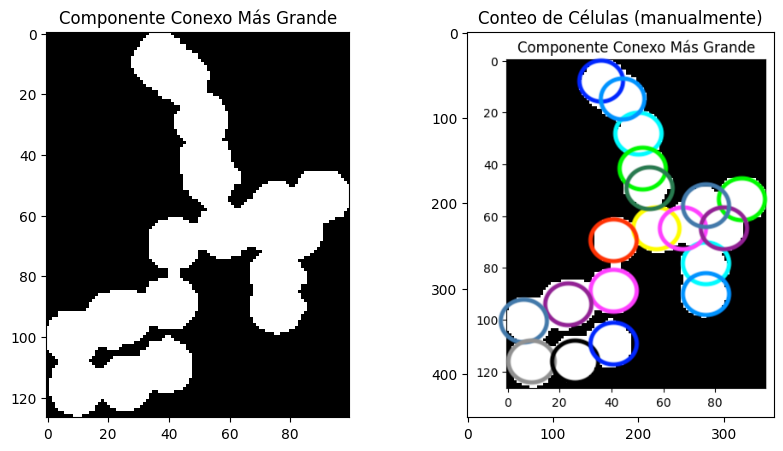

In [428]:
# Extrae la máscara del componente conexo más grande
max_component = (labels == max_component_index).astype(np.uint8) * 255

# Recortar la imagen para mostrar solo el componente conexo más grande
x, y, w, h, area = stats[max_component_index]
max_component = max_component[y:y+h, x:x+w]

# Mostrar la imagen del componente conexo más grande
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(max_component, cmap='gray')
plt.title('Componente Conexo Más Grande')

conteo = cv2.imread('img/output.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Conteo de Células (manualmente)')

plt.show()


En este caso, logramos identificar **19 células diferentes** en el componente conexo más grande. 

-------

#### *Operaciones morofológicas*

Posteriormente se aplicaron operaciones morfológicas simples para poder separar las células. Esto se realizó con el proósito de poder contar cuántas células hay en total.

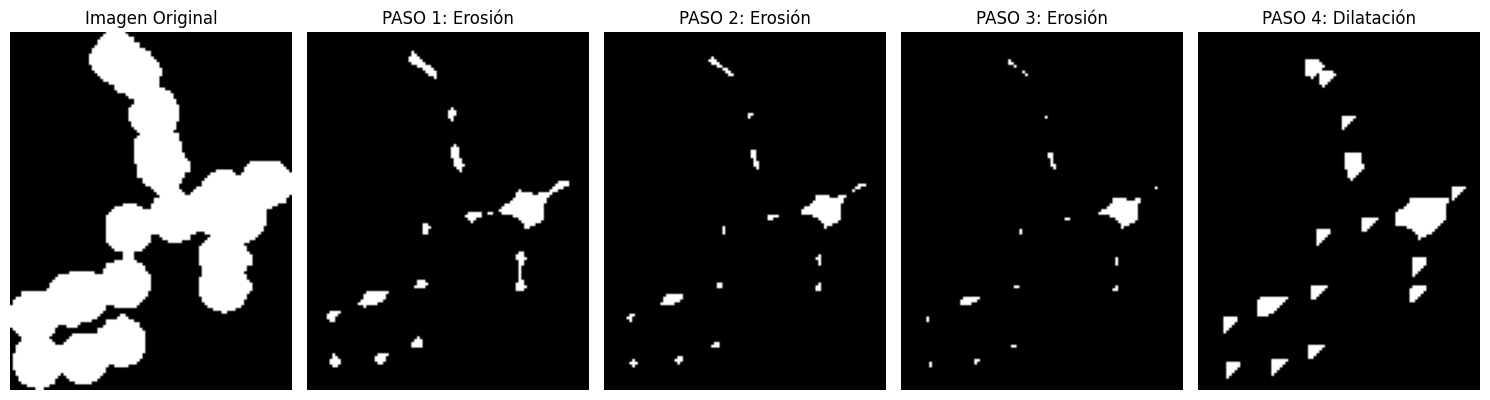

In [429]:
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(1, 5, 1)
plt.imshow(max_component, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# ---------------------------- OPERACIONES MORFOLÓGICAS 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
cells = cv2.erode(max_component, kernel, iterations=1)

plt.subplot(1, 5, 2)
plt.imshow(cells, cmap='gray')
plt.title('PASO 1: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cells = cv2.erode(cells, kernel, iterations=1)

plt.subplot(1, 5, 3)
plt.imshow(cells, cmap='gray')
plt.title('PASO 2: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 2))
cells = cv2.erode(cells, kernel, iterations=1)

plt.subplot(1, 5, 4)
plt.imshow(cells, cmap='gray')
plt.title('PASO 3: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
cells = cv2.dilate(cells, kernel, iterations=4)

plt.subplot(1, 5, 5)
plt.imshow(cells, cmap='gray')
plt.title('PASO 4: Dilatación')
plt.axis('off')

plt.tight_layout()

Como se puede observar en los pasos 1 a 4, las operaciones de erosión y dilatación lograron separar las células que no estaban tan pegadas. Sin embargo, no lograron separar aquellas que estaban sobrepuestas.

Por tal razón, se optó por aplicar hit-or-miss para intentar separar las células que estaban sobrepuestas.

(-0.5, 99.5, 126.5, -0.5)

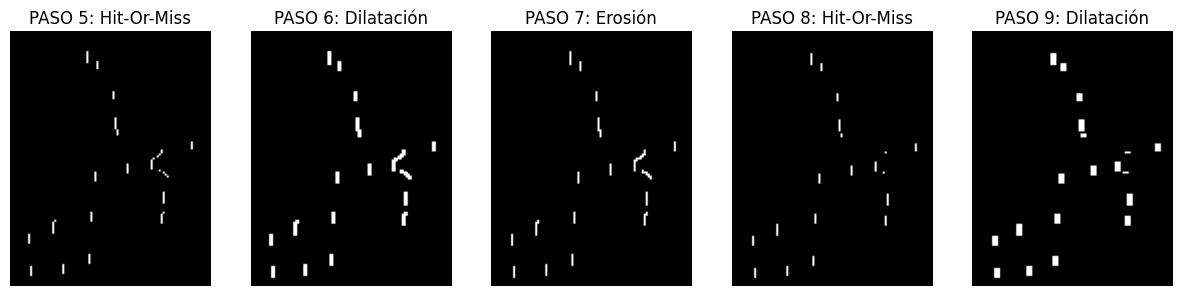

In [430]:
plt.figure(figsize=(15, 10))

# ---------------------------- OPERACIONES MORFOLÓGICAS 

kernel1 = [
    [0, 1, 1]
]

cells2 = ndimage.binary_hit_or_miss(cells, structure1=kernel1).astype(np.uint8)

plt.subplot(1, 5, 1)
plt.imshow(cells2, cmap='gray')
plt.title('PASO 5: Hit-Or-Miss')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cells2 = cv2.dilate(cells2, kernel, iterations=1)

plt.subplot(1, 5, 2)
plt.imshow(cells2, cmap='gray')
plt.title('PASO 6: Dilatación')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
cells2 = cv2.erode(cells2, kernel, iterations=1)

plt.subplot(1, 5, 3)
plt.imshow(cells2, cmap='gray')
plt.title('PASO 7: Erosión')
plt.axis('off')

# ----------------------------

kernel1 = [
    [0, 1],
    [0, 1]
]

cells2 = ndimage.binary_hit_or_miss(cells2, structure1=kernel1).astype(np.uint8)

plt.subplot(1, 5, 4)
plt.imshow(cells2, cmap='gray')
plt.title('PASO 8: Hit-Or-Miss')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
cells2 = cv2.dilate(cells2, kernel, iterations=2)

plt.subplot(1, 5, 5)
plt.imshow(cells2, cmap='gray')
plt.title('PASO 9: Dilatación')
plt.axis('off')

# ----------------------------

Como se puede observar en los pasos 5 a 9, la operación de hit-or-miss logró separar las células que estaban sobrepuestas. En realidad, se logró separar todas las células que se visualizan en la imágen.

Con este procedimiento listo, se utilizó las herramienta de skimage (que también se utilizó en los ejemplos de clase) para identificar las diferentes células y contar cuántas hay.

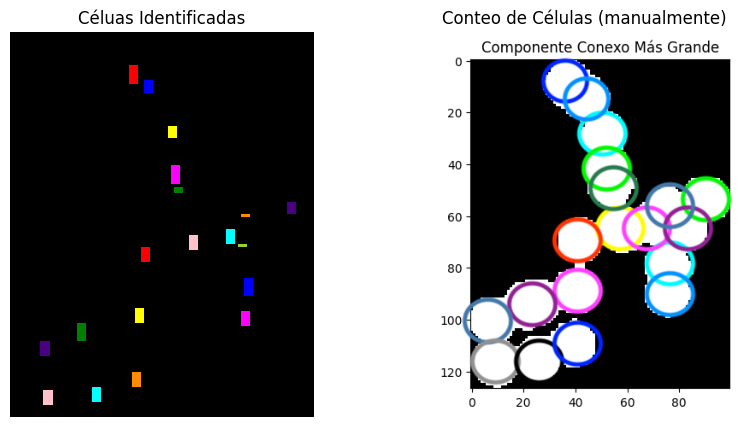

Se identificaron 19 células en la imagen.


In [431]:
# Determinar las células en la imagen
label_image = label(cells2)
regions = regionprops(label_image)

# Generar una imagen con colores para visualizar las células
colored_cells = label2rgb(label_image, bg_label=0)
num_cells = len(regions)

# Mostrar la imagen con las células identificadas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(colored_cells)
plt.title('Céluas Identificadas')
plt.axis('off')

conteo = cv2.imread('img/output.png')
plt.subplot(1, 2, 2)
plt.imshow(conteo, cmap='gray')
plt.title('Conteo de Células (manualmente)')
plt.axis('off')

plt.show()

print(f"Se identificaron {num_cells} células en la imagen.")

Como se puede observar, a través del procedimiento anteriormente expuesto, se logró identificar **19 células diferentes** en la imágen. 

- En este caso, se puede concluir que Hit-Or-Miss fue la operación morfológica que funciona mejor en casos donde es difícil separar las células. Esto se debe a que esta operación es capaz de identificar patrones específicos en la imágen. 

- En el caso de erosión y dilatación, estas operaciones solo expanden o contraen los objetos en la imágen. Por tal razón, no son tan efectivas en casos donde los objetos están sobrepuestos.

- Cabe destacar que si hubiera una célula totalmente sobrepuesta por otra, no se podría identificar con ninguna de las operaciones morfológicas. Esto obviamente debido a que no se puede diferenciar entre una célula y otra.